In [1]:
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.datasets import cifar10

In [2]:
tf.__version__

'2.8.0'

In [3]:
(X_train,y_train),(X_test,y_test)= cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [4]:
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [5]:
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [7]:
X_train=X_train/255.
X_test=X_test/255.

In [9]:
X_train.dtype

dtype('float64')

[0]


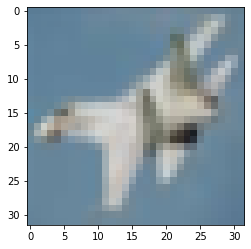

In [14]:
plt.imshow(X_test[10])
print(y_test[10])

In [15]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [18]:
model = tf.keras.models.Sequential()

In [19]:
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [22]:
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3, padding = 'same',activation='relu',input_shape=[32,32,3]))

In [23]:
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3, padding = 'same',activation='relu'))

In [24]:
model.add(tf.keras.layers.MaxPool2D(pool_size = 2,strides=2,padding = 'valid'))

In [26]:
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))

In [29]:
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding = 'same',activation='relu'))

model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))

In [30]:
model.add(tf.keras.layers.Flatten())

In [31]:
model.add(tf.keras.layers.Dense(units=128,activation='relu'))



In [32]:
model.add(tf.keras.layers.Dense(units=10,activation='softmax'))

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 64)        36928     
                                                      

In [34]:
model.compile(loss='sparse_categorical_crossentropy',optimizer = 'Adam',metrics=['sparse_categorical_accuracy'])

In [37]:
model.fit(X_train,y_train,batch_size=32,
          epochs=100
          ,verbose=2,
          validation_data=(X_test,y_test)
          
          )

Epoch 1/100
1563/1563 - 8s - loss: 0.8043 - sparse_categorical_accuracy: 0.7201 - val_loss: 0.8326 - val_sparse_categorical_accuracy: 0.7110 - 8s/epoch - 5ms/step
Epoch 2/100
1563/1563 - 8s - loss: 0.6675 - sparse_categorical_accuracy: 0.7653 - val_loss: 0.7942 - val_sparse_categorical_accuracy: 0.7302 - 8s/epoch - 5ms/step
Epoch 3/100
1563/1563 - 8s - loss: 0.5497 - sparse_categorical_accuracy: 0.8062 - val_loss: 0.7556 - val_sparse_categorical_accuracy: 0.7501 - 8s/epoch - 5ms/step
Epoch 4/100
1563/1563 - 8s - loss: 0.4424 - sparse_categorical_accuracy: 0.8449 - val_loss: 0.8075 - val_sparse_categorical_accuracy: 0.7457 - 8s/epoch - 5ms/step
Epoch 5/100
1563/1563 - 8s - loss: 0.3572 - sparse_categorical_accuracy: 0.8723 - val_loss: 0.8474 - val_sparse_categorical_accuracy: 0.7489 - 8s/epoch - 5ms/step
Epoch 6/100
1563/1563 - 8s - loss: 0.2827 - sparse_categorical_accuracy: 0.8996 - val_loss: 0.9406 - val_sparse_categorical_accuracy: 0.7466 - 8s/epoch - 5ms/step
Epoch 7/100
1563/1563 